In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

#### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。
virgicolorとvirginica
sepal_lengthとpetal_length

In [2]:
iris_data_set = load_iris()
x = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame
df = pd.concat([x, y], axis=1)

In [3]:
iris_data_set.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#print(df.columns.values)
col_name = df.columns.values
data = df[[col_name[0], col_name[2], col_name[4]]]
data = data[data["Species"] != 0]
#print(data)

#### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

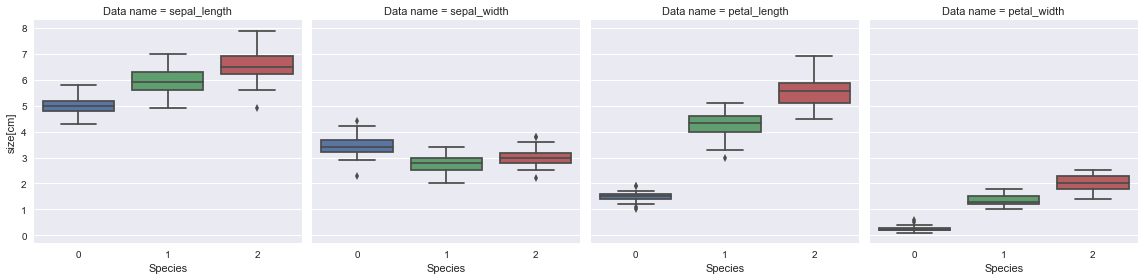

In [5]:
"""
データの種類別に複数のグラフを表示させるために"size, species, data name"のrow=600, Col=3のデータフォーマットへ変換する
"""
#データの種類別にデータを抽出
pd_sepal_length = df[[col_name[0], col_name[4]]]
pd_sepal_width = df[[col_name[1], col_name[4]]]
pd_petal_length = df[[col_name[2], col_name[4]]]
pd_petal_width = df[[col_name[3], col_name[4]]]
#それぞれのデータに"Data name"列を追加&データ名をセット
pd_sepal_length['Data name'] = 'sepal_length'
pd_sepal_width['Data name'] = 'sepal_width'
pd_petal_length['Data name'] = 'petal_length'
pd_petal_width['Data name'] = 'petal_width'
#Colmun名前を"size[cm]"へ統一
pd_sepal_length = pd_sepal_length.rename(columns={col_name[0]: 'size[cm]'})
pd_sepal_width = pd_sepal_width.rename(columns={col_name[1]: 'size[cm]'})
pd_petal_length = pd_petal_length.rename(columns={col_name[2]: 'size[cm]'})
pd_petal_width = pd_petal_width.rename(columns={col_name[3]: 'size[cm]'})
#全てのデータを結合し新しいpandas data formatを作る
new_df = pd.concat([pd_sepal_length, pd_sepal_width, pd_petal_length, pd_petal_width]).reset_index(drop=True)
#print(new_df)

#sb.boxplot(x='Species', y='sepal length (cm)', data=df, hue='Data type')
sb.factorplot(x='Species', y='size[cm]', data=new_df, kind='box', col='Data name')

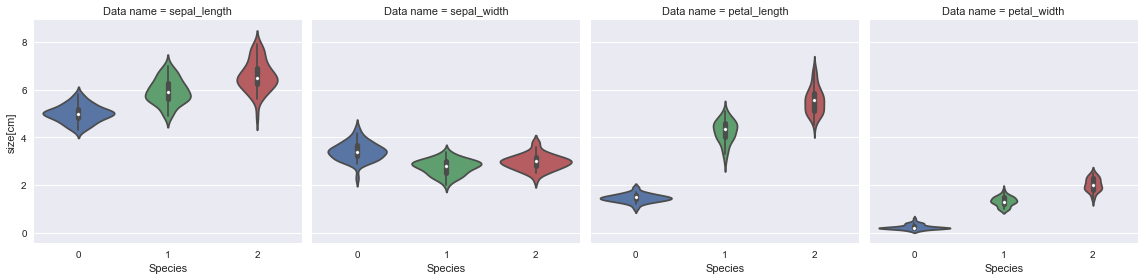

In [6]:
sb.factorplot(x='Species', y='size[cm]', data=new_df, kind='violin', col='Data name')

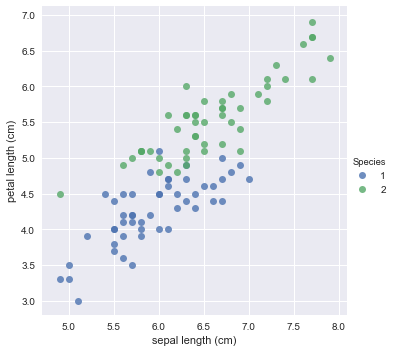

In [7]:
sb.lmplot('sepal length (cm)', 'petal length (cm)', data=data, hue='Species', fit_reg=False )

#### 【問題2】前処理・学習用データと検証用データの分割
前処理の一貫として、学習用（train）データと検証用（validation）データの分割を行います。今回は学習用データ75%、検証用データ25%として分割してください。
scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。
sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation

In [8]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)
print("元データ数：{}　学習データ数：{}　検証データ数：{}".format(len(data), len(train_data), len(test_data)))
print(test_data)

元データ数：100　学習データ数：75　検証データ数：25
     sepal length (cm)  petal length (cm)  Species
133                6.3                5.1        2
103                6.3                5.6        2
120                6.9                5.7        2
95                 5.7                4.2        1
94                 5.6                4.2        1
89                 5.5                4.0        1
72                 6.3                4.9        1
130                7.4                6.1        2
60                 5.0                3.5        1
50                 7.0                4.7        1
68                 6.2                4.5        1
80                 5.5                3.8        1
123                6.3                4.9        2
83                 6.0                5.1        1
140                6.7                5.6        2
54                 6.5                4.6        1
126                6.2                4.8        2
127                6.1                4.9        2
6

In [9]:
train_data_feature = train_data[['sepal length (cm)', 'petal length (cm)']].values
train_data_target = train_data[['Species']].values

In [10]:
test_data_feature = test_data[['sepal length (cm)', 'petal length (cm)']].values
test_data_target = test_data[['Species']].values

#### 【問題3】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。
sklearn.preprocessing.StandardScaler — scikit-learn 0.20.2 documentation

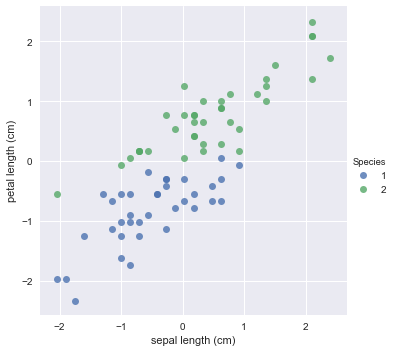

In [11]:
#学習データの特徴量を標準化
scaler = StandardScaler()
scaler.fit(train_data_feature)
#print("Mean:{} Var:{}".format(scaler.mean_, scaler.var_))
data_normalized = scaler.transform(train_data_feature)
#print("標準化データ\n{}".format(data_normalized))

index = [i for i in range(0, len(data_normalized))]
columns = ['sepal length (cm)', 'petal length (cm)']
pd_normalized_train_data = pd.DataFrame(data_normalized, index=index, columns=columns, dtype='float')
pd_normalized_train_data['Species'] = train_data_target
sb.lmplot('sepal length (cm)', 'petal length (cm)', data=pd_normalized_train_data, hue='Species', fit_reg=False )

In [12]:
#検証データも標準化
data_normalized = scaler.transform(test_data_feature)
index = [i for i in range(0, len(data_normalized))]
columns = ['sepal length (cm)', 'petal length (cm)']
pd_normalized_test_data = pd.DataFrame(data_normalized, index=index, columns=columns, dtype='float')
pd_normalized_test_data['Species'] = test_data_target

#### 【問題4】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは学習用データです。
sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation
学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [13]:
neigh = KNeighborsClassifier(n_neighbors=5)
#pd_normalized_data['Species'].values
neigh.fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
neigh_1nn = KNeighborsClassifier(n_neighbors=1)
#pd_normalized_data['Species'].values
neigh_1nn.fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
neigh_3nn = KNeighborsClassifier(n_neighbors=3)
#pd_normalized_data['Species'].values
neigh_3nn.fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
result_w_1nn = neigh_1nn.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)
result_w_3nn = neigh_3nn.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)
result_w_5nn = neigh.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)

In [17]:
print("1_nn:{}".format(result_w_3nn))
print("3_nn:{}".format(result_w_3nn))
print("5_nn:{}".format(result_w_3nn))

print("答え：{}".format(pd_normalized_test_data['Species'].values))

1_nn:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3_nn:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5_nn:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
答え：[2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2]


#### 【問題5】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。
2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。scikit-learnに用意されていますので、それぞれを計算してください。また、それぞれの意味について簡単に調査してマークダウンでまとめてください。  
sklearn.metrics.accuracy_score — scikit-learn 0.20.2 documentation  
sklearn.metrics.precision_score — scikit-learn 0.20.2 documentation  
sklearn.metrics.recall_score — scikit-learn 0.20.2 documentation  
sklearn.metrics.f1_score — scikit-learn 0.20.2 documentation  
precision、recall、f値を計算する背景にはTrue Positive、True Negative、False Positive、False Negativeがあります。  
この4種類を計算し表示するものとして混合行列があります。これもscikit-learnを使い表示させてください。  
sklearn.metrics.confusion_matrix — scikit-learn 0.20.2 documentation  

In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy score={}".format(accuracy_score(pd_normalized_test_data['Species'].values, result_w_3nn)))

Accuracy score=0.8


Accuracyは正解率を表す。今回の場合は20/25なのでAccuracyは80%

In [19]:
from sklearn.metrics import precision_score
print("Precision score={}".format(precision_score(pd_normalized_test_data['Species'].values, result_w_3nn, average='binary')))

Precision score=0.8


Precision精度は次の式で計算される。　
Precision = tp / (tp + fp)  
ここでtp:true positive（ポジティブに分類されるべきものが正しくポジティブに分類された件数）、 fp:false positive（本来ネガティブに分類されるべきものが間違ってポジティブに分類されてしまった件数）  
ポジティブとして検出されたもののうち実際にポジティブであったかを表す。

In [20]:
from sklearn.metrics import recall_score
print("Recall score={:.2f}".format(recall_score(pd_normalized_test_data['Species'].values, result_w_3nn, average='binary')))

Recall score=0.86


recall_scoreは次の式で計算される。　
recall_score = tp / (tp + fn)  
ここでtp:true positive（ポジティブに分類されるべきものが正しくポジティブに分類された件数）、 fn:false negative（本来ポジティブに分類されるべきものが間違ってネガティブに分類されてしまった件数）  
本来ポジティブとして検出されるべきものがどの程度ポジティブとして検出されたかを表す。感度とも呼ばれる。

In [21]:
from sklearn.metrics import f1_score
print("f1 score={:.2f}".format(f1_score(pd_normalized_test_data['Species'].values, result_w_3nn, average='binary')))

f1 score=0.83


f1_scoreは次の式で計算される。
F1 = 2 * (precision * recall) / (precision + recall)  
精度と感度のバランスを表す。精度、感度ともに高い場合F1は高くなる。

In [22]:
from sklearn.metrics import confusion_matrix
print("confusion matrix=\n{}".format(confusion_matrix(pd_normalized_test_data['Species'].values, result_w_3nn)))

confusion matrix=
[[12  2]
 [ 3  8]]


#### 【問題6】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。どう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。可能であればより見やすく改良も行いましょう。

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

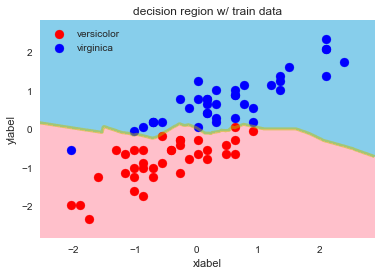

In [24]:
decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_train_data['Species'].values, 
                neigh,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

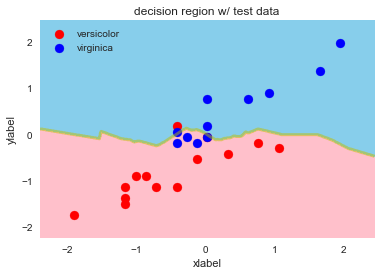

In [25]:
decision_region(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_test_data['Species'].values, 
                neigh, 
                step=0.01, 
                title='decision region w/ test data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

#### 【問題7】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べてください。  
最近傍法  
ロジスティック回帰  
SVM  
決定木  
ランダムフォレスト  
公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。
sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.20.2 documentation
sklearn.svm.SVC — scikit-learn 0.20.2 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.2 documentation

##### ロジスティック回帰  

Accuracy score=0.84
Precision score=0.8125
Recall score=0.93
f1 score=0.87


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


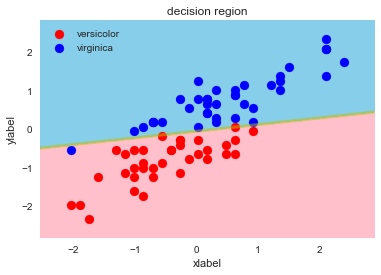

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values,
                                                                                        pd_normalized_train_data[['Species']].values)
result_logistic = clf.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(pd_normalized_test_data['Species'].values, result_logistic)))
print("Precision score={}".format(precision_score(pd_normalized_test_data['Species'].values, result_logistic, average='binary')))
print("Recall score={:.2f}".format(recall_score(pd_normalized_test_data['Species'].values, result_logistic, average='binary')))
print("f1 score={:.2f}".format(f1_score(pd_normalized_test_data['Species'].values, result_logistic, average='binary')))

decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_train_data['Species'].values, 
                clf,
                step=0.01, 
                title='decision region', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

##### SVM 

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score=0.84
Precision score=0.8571428571428571
Recall score=0.86
f1 score=0.86


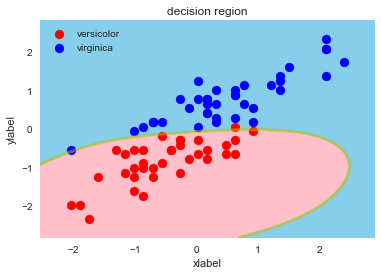

In [27]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values,
            pd_normalized_train_data[['Species']].values)
result_svm = clf_svm.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(pd_normalized_test_data['Species'].values, result_svm)))
print("Precision score={}".format(precision_score(pd_normalized_test_data['Species'].values, result_svm, average='binary')))
print("Recall score={:.2f}".format(recall_score(pd_normalized_test_data['Species'].values, result_svm, average='binary')))
print("f1 score={:.2f}".format(f1_score(pd_normalized_test_data['Species'].values, result_svm, average='binary')))

decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_train_data['Species'].values, 
                clf_svm,
                step=0.01, 
                title='decision region', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

##### 決定木 

Accuracy score=0.84
Precision score=0.8125
Recall score=0.93
f1 score=0.87


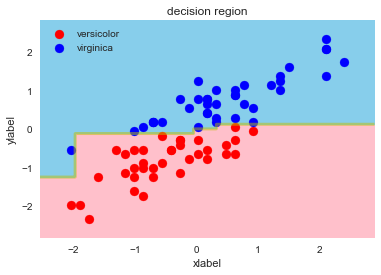

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(random_state=0)
cross_val_score(clf_dtc, 
                pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_train_data['Species'].values,
                cv=10)

clf_dtc.fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values,
            pd_normalized_train_data[['Species']].values)
result_dtc = clf_dtc.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(pd_normalized_test_data['Species'].values, result_dtc)))
print("Precision score={}".format(precision_score(pd_normalized_test_data['Species'].values, result_dtc, average='binary')))
print("Recall score={:.2f}".format(recall_score(pd_normalized_test_data['Species'].values, result_dtc, average='binary')))
print("f1 score={:.2f}".format(f1_score(pd_normalized_test_data['Species'].values, result_dtc, average='binary')))

decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_train_data['Species'].values, 
                clf_dtc,
                step=0.01, 
                title='decision region', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

##### ランダムフォレスト

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy score=0.8
Precision score=0.7647058823529411
Recall score=0.93
f1 score=0.84


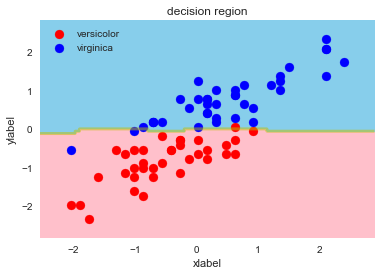

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rfc.fit(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values,
            pd_normalized_train_data[['Species']].values)
result_rfc = clf_rfc.predict(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(pd_normalized_test_data['Species'].values, result_rfc)))
print("Precision score={}".format(precision_score(pd_normalized_test_data['Species'].values, result_rfc, average='binary')))
print("Recall score={:.2f}".format(recall_score(pd_normalized_test_data['Species'].values, result_rfc, average='binary')))
print("f1 score={:.2f}".format(f1_score(pd_normalized_test_data['Species'].values, result_rfc, average='binary')))

decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                pd_normalized_train_data['Species'].values, 
                clf_rfc,
                step=0.01, 
                title='decision region', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

#### 結果まとめ

| 学習方法 | 指標値 |　考察  |
|:-----------|------------:|:------------:|
| 最近傍法 | Accuracy score=0.80<br>Precision score=0.80<br>Recall score=0.86<br>f1 score=0.83 |   |
| ロジスティック回帰 | Accuracy score=0.84<br>Precision score=0.81<br>Recall score=0.93<br>f1 score=0.87 |  |
| SVM | Accuracy score=0.84<br>Precision score=0.86<br>Recall score=0.86<br>f1 score=0.86 |  |
| 決定木 | Accuracy score=0.84<br>Precision score=0.81<br>Recall score=0.93<br>f1 score=0.87 |  |
| ランダムフォレスト | Accuracy score=0.80<br>Precision score=0.76<br>Recall score=0.93<br>f1 score=0.84 |  |

##### 決定領域＋学習データ

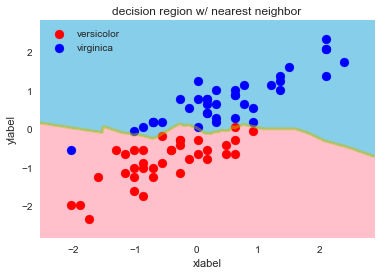

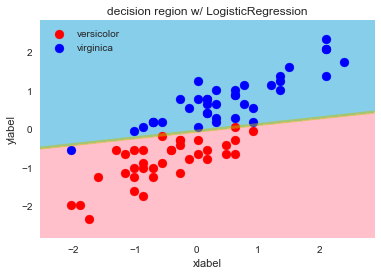

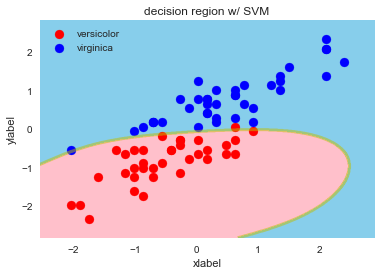

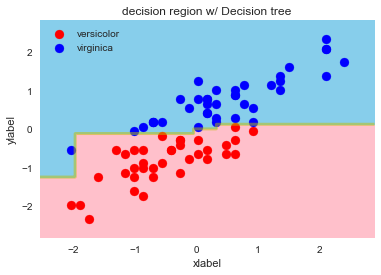

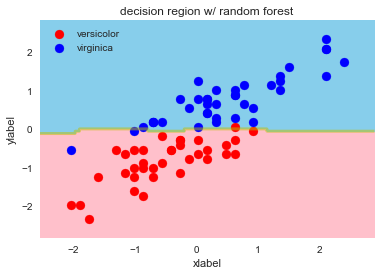

In [30]:
decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values, neigh, step=0.01, title='decision region w/ nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values, clf, step=0.01, title='decision region w/ LogisticRegression',  xlabel='xlabel', ylabel='ylabel',  target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values, clf_svm, step=0.01, title='decision region w/ SVM',  xlabel='xlabel',  ylabel='ylabel',  target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values, clf_dtc, step=0.01, title='decision region w/ Decision tree',  xlabel='xlabel',  ylabel='ylabel',   target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_train_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_train_data['Species'].values, clf_rfc,step=0.01, title='decision region w/ random forest', xlabel='xlabel',  ylabel='ylabel', target_names=['versicolor', 'virginica'])


##### 決定領域＋テストデータ

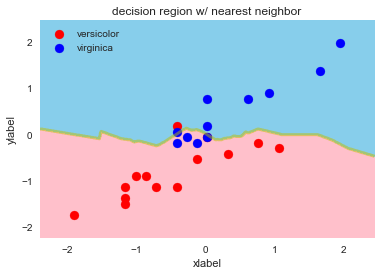

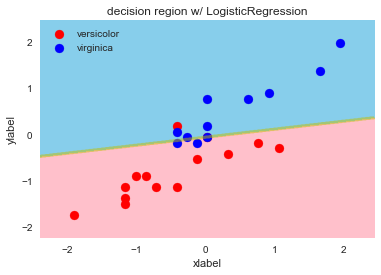

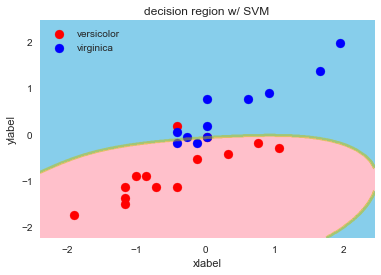

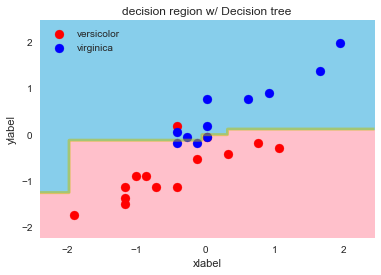

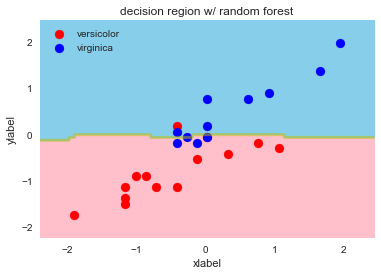

In [31]:
decision_region(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_test_data['Species'].values, neigh, step=0.01, title='decision region w/ nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_test_data['Species'].values, clf, step=0.01, title='decision region w/ LogisticRegression',  xlabel='xlabel', ylabel='ylabel',  target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_test_data['Species'].values, clf_svm, step=0.01, title='decision region w/ SVM',  xlabel='xlabel',  ylabel='ylabel',  target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_test_data['Species'].values, clf_dtc, step=0.01, title='decision region w/ Decision tree',  xlabel='xlabel',  ylabel='ylabel',   target_names=['versicolor', 'virginica'])
decision_region(pd_normalized_test_data[['sepal length (cm)', 'petal length (cm)']].values, pd_normalized_test_data['Species'].values, clf_rfc,step=0.01, title='decision region w/ random forest', xlabel='xlabel',  ylabel='ylabel', target_names=['versicolor', 'virginica'])


#### 【問題8】（アドバンス課題）各パラメータの意味
手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

#### 【問題8】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

##### 最近傍法（標準化無し）

In [32]:
#最近傍法
neigh.fit(train_data[['sepal length (cm)', 'petal length (cm)']].values, train_data['Species'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
result_wo_normalized = neigh.predict(test_data[['sepal length (cm)', 'petal length (cm)']].values)
print("Accuracy score={}".format(accuracy_score(test_data['Species'].values, result_wo_normalized)))
print("Precision score={}".format(precision_score(test_data['Species'].values, result_wo_normalized, average='binary')))
print("Recall score={:.2f}".format(recall_score(test_data['Species'].values, result_wo_normalized, average='binary')))
print("f1 score={:.2f}".format(f1_score(test_data['Species'].values, result_wo_normalized, average='binary')))


Accuracy score=0.8
Precision score=0.7647058823529411
Recall score=0.93
f1 score=0.84


##### ロジスティック回帰（標準化無し）

In [34]:
#最近傍法
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(train_data[['sepal length (cm)', 'petal length (cm)']].values, train_data['Species'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
result_wo_normalized = clf.predict(test_data[['sepal length (cm)', 'petal length (cm)']].values)
print("Accuracy score={}".format(accuracy_score(test_data['Species'].values, result_wo_normalized)))
print("Precision score={}".format(precision_score(test_data['Species'].values, result_wo_normalized, average='binary')))
print("Recall score={:.2f}".format(recall_score(test_data['Species'].values, result_wo_normalized, average='binary')))
print("f1 score={:.2f}".format(f1_score(test_data['Species'].values, result_wo_normalized, average='binary')))


Accuracy score=0.84
Precision score=0.8125
Recall score=0.93
f1 score=0.87


##### SVM （標準化なし）

In [36]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(train_data[['sepal length (cm)', 'petal length (cm)']].values,
            train_data[['Species']].values)
result_svm = clf_svm.predict(test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(test_data['Species'].values, result_svm)))
print("Precision score={}".format(precision_score(test_data['Species'].values, result_svm, average='binary')))
print("Recall score={:.2f}".format(recall_score(test_data['Species'].values, result_svm, average='binary')))
print("f1 score={:.2f}".format(f1_score(test_data['Species'].values, result_svm, average='binary')))


Accuracy score=0.84
Precision score=0.8571428571428571
Recall score=0.86
f1 score=0.86


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### 決定木 （標準化無し）

In [37]:
clf_dtc = DecisionTreeClassifier(random_state=0)
cross_val_score(clf_dtc, 
                train_data[['sepal length (cm)', 'petal length (cm)']].values, 
                train_data['Species'].values,
                cv=10)

clf_dtc.fit(train_data[['sepal length (cm)', 'petal length (cm)']].values,
            train_data[['Species']].values)
result_dtc = clf_dtc.predict(test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(test_data['Species'].values, result_dtc)))
print("Precision score={}".format(precision_score(test_data['Species'].values, result_dtc, average='binary')))
print("Recall score={:.2f}".format(recall_score(test_data['Species'].values, result_dtc, average='binary')))
print("f1 score={:.2f}".format(f1_score(test_data['Species'].values, result_dtc, average='binary')))


Accuracy score=0.84
Precision score=0.8125
Recall score=0.93
f1 score=0.87


##### ランダムフォレスト（標準化無し）

In [38]:
clf_rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rfc.fit(train_data[['sepal length (cm)', 'petal length (cm)']].values,
            train_data[['Species']].values)
result_rfc = clf_rfc.predict(test_data[['sepal length (cm)', 'petal length (cm)']].values)

print("Accuracy score={}".format(accuracy_score(test_data['Species'].values, result_rfc)))
print("Precision score={}".format(precision_score(test_data['Species'].values, result_rfc, average='binary')))
print("Recall score={:.2f}".format(recall_score(test_data['Species'].values, result_rfc, average='binary')))
print("f1 score={:.2f}".format(f1_score(test_data['Species'].values, result_rfc, average='binary')))


Accuracy score=0.8
Precision score=0.7647058823529411
Recall score=0.93
f1 score=0.84


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


#### 結果まとめ

| 学習方法 | 指標 |　指標値(標準化有り) |　指標値(標準化無し) |  考察　　|
|:-----------:|:-----------:|:------------:|:------------:|:------------:|
| 最近傍法 | Accuracy score<br>Precision score<br>Recall score<br>f1 score | 0.80<br>0.80<br>0.86<br>0.83 | 0.80<br>0.76<br>0.93<br>0.84 | 標準化の結果精度が上がったがF1は若干下がったた。<br>全体としては標準化の効果があまりなかった |
| ロジスティック回帰 | Accuracy score<br>Precision score<br>Recall score<br>f1 score | 0.84<br>0.81<br>0.93<br>0.87 | 0.84<br>0.81<br>0.93<br>0.87 | 指標に変化はなかった |
| SVM | Accuracy score<br>Precision score<br>Recall score<br>f1 score | 0.84<br>0.86<br>0.86<br>0.86 | 0.84<br>0.86<br>0.86<br>0.86 | 指標に変化はなかった |
| 決定木 | Accuracy score<br>Precision score<br>Recall score<br>f1 score | 0.84<br>0.81<br>0.93<br>0.87 | 0.84<br>0.81<br>0.93<br>0.87 | 指標に変化はなかった |
| ランダムフォレスト | Accuracy score<br>Precision score<br>Recall score<br>f1 score | 0.80<br>0.76<br>0.93<br>0.84 | 0.80<br>0.76<br>0.93<br>0.84 | 指標に変化はなかった |

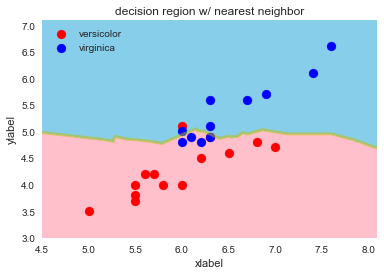

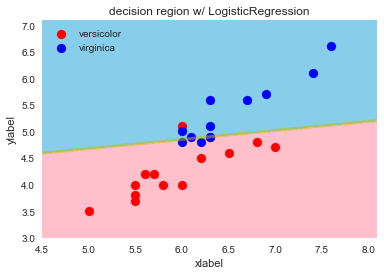

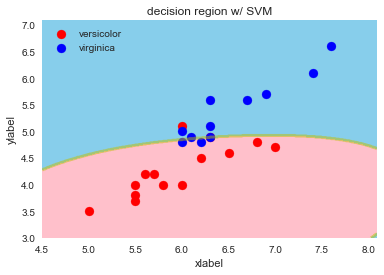

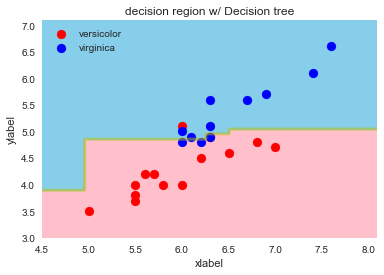

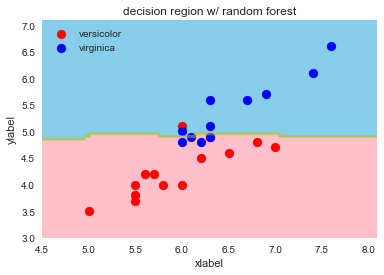

In [39]:
decision_region(test_data[['sepal length (cm)', 'petal length (cm)']].values, test_data['Species'].values, neigh, step=0.01, title='decision region w/ nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(test_data[['sepal length (cm)', 'petal length (cm)']].values, test_data['Species'].values, clf, step=0.01, title='decision region w/ LogisticRegression',  xlabel='xlabel', ylabel='ylabel',  target_names=['versicolor', 'virginica'])
decision_region(test_data[['sepal length (cm)', 'petal length (cm)']].values, test_data['Species'].values, clf_svm, step=0.01, title='decision region w/ SVM',  xlabel='xlabel',  ylabel='ylabel',  target_names=['versicolor', 'virginica'])
decision_region(test_data[['sepal length (cm)', 'petal length (cm)']].values, test_data['Species'].values, clf_dtc, step=0.01, title='decision region w/ Decision tree',  xlabel='xlabel',  ylabel='ylabel',   target_names=['versicolor', 'virginica'])
decision_region(test_data[['sepal length (cm)', 'petal length (cm)']].values, test_data['Species'].values, clf_rfc,step=0.01, title='decision region w/ random forest', xlabel='xlabel',  ylabel='ylabel', target_names=['versicolor', 'virginica'])


#### 【問題9】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。
ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは意識せず動作させることができます。しかし、指標値precision、recall、f値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使いますので、これについて調査して説明をまとめましょう。
また、決定領域を可視化する場合は前述の関数を適切に書き換える必要があります。以下が出力例です。